In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/CarModelsClassification"

/content/drive/My Drive/CarModelsClassification


In [0]:
# Pre process Data

from zipfile import ZipFile
import os

def extract_data(filename):
    if not os.path.exists(filename[:-4]):
        with ZipFile(filename, 'r') as zip:
            # zip.printdir()
            print("Extracting all the file now...")
            zip.extractall()
            print('Done!')


In [0]:
filename = "stanford-car-dataset-by-classes-folder.zip"
extract_data(filename)

Extracting all the file now...
Done!


In [3]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
import scipy.io as sio
import os

batch_size = 32
input_shape = (240, 240)
train_dir = "/content/drive/My Drive/CarModelsClassification/car_data/car_data/train"
test_dir = "/content/drive/My Drive/CarModelsClassification/car_data/car_data/test"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=input_shape,
    batch_size=batch_size)

validation_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=input_shape,
    batch_size=batch_size)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [20]:
!pip install efficientnet

In [0]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras import Model
import efficientnet.keras as efn

base_model = efn.EfficientNetB1(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Using TensorFlow backend.













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
27164672/27164032 [==============================] - 1s 0us/step



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
________________________________________________________________________________________________

In [0]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.samples // batch_size + 1,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples // batch_size + 1,
                              epochs=10,
                              workers=8,
                              max_queue_size=32,
                              verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summary for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# save model
model.save("my_model0.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
 52/255 [=====>........................] - ETA: 9:09 - loss: 5.3401 - acc: 0.0150

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 126 could not be retrieved. It could be because a worker has died.
  UserWarning)


143/255 [===============>..............] - ETA: 7:25 - loss: 5.0395 - acc: 0.0483

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 177 could not be retrieved. It could be because a worker has died.
  UserWarning)


159/255 [=================>............] - ETA: 6:41 - loss: 4.9869 - acc: 0.0572

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 158 could not be retrieved. It could be because a worker has died.
  UserWarning)


254/255 [============================>.] - ETA: 4s - loss: 4.6962 - acc: 0.0966

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 112 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 216 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 249 could not be retrieved. It could be because a worker has died.
  UserWarning)


255/255 [==============================] - 1597s 6s/step - loss: 4.6934 - acc: 0.0968 - val_loss: 3.7763 - val_acc: 0.2373
Epoch 2/10


In [0]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode="categorical",
                                                    target_size=input_shape,
                                                    batch_size=batch_size)

validation_generator=test_datagen.flow_from_directory(test_dir,
                                                      class_mode="categorical",
                                                      target_size=input_shape,
                                                      batch_size=batch_size)

for layer in model.layers:
    layer.trainable=True

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
____

Epoch 1/20
255/255 [==============================] - 245s 960ms/step - loss: 0.0692 - acc: 0.9906 - val_loss: 0.7045 - val_acc: 0.8089
Epoch 2/20
255/255 [==============================] - 231s 907ms/step - loss: 0.0650 - acc: 0.9917 - val_loss: 0.7028 - val_acc: 0.8094
Epoch 3/20
255/255 [==============================] - 231s 907ms/step - loss: 0.0640 - acc: 0.9922 - val_loss: 0.7038 - val_acc: 0.8056
Epoch 4/20
255/255 [==============================] - 231s 907ms/step - loss: 0.0623 - acc: 0.9913 - val_loss: 0.6948 - val_acc: 0.8092
Epoch 5/20
255/255 [==============================] - 231s 906ms/step - loss: 0.0587 - acc: 0.9933 - val_loss: 0.6942 - val_acc: 0.8095
Epoch 6/20
255/255 [==============================] - 231s 906ms/step - loss: 0.0578 - acc: 0.9914 - val_loss: 0.6995 - val_acc: 0.8084
Epoch 7/20
255/255 [==============================] - 233s 912ms/step - loss: 0.0541 - acc: 0.9945 - val_loss: 0.6847 - val_acc: 0.8145
Epoch 8/20
255/255 [============================

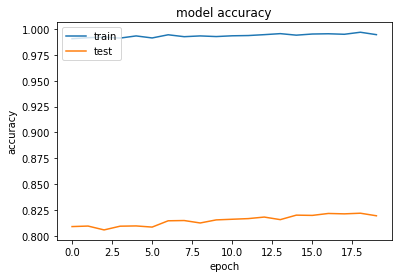

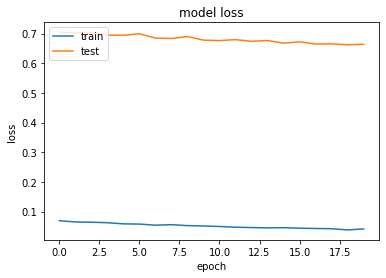

In [0]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=20,
                    workers=8,
                    max_queue_size=32,
                    verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Save model
model_name = 'my_model.h5'
model.save(model_name)
# del model

In [11]:
# load model 1
from keras.models import load_model
import efficientnet.keras as efn

print('Loading model...')
test_model = load_model('my_model0.h5')
test_model.summary()
print('Done!')

Loading model...










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
_________________________________________________

In [38]:
# load model 2
from keras.models import load_model
import efficientnet.keras as efn

print('Loading model...')
test_model1 = load_model('my_model1.h5')
test_model1.summary()
print('Done!')


Loading model...
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
___________________________________________________________________________

[168]
Top 1 result: Nissan Juke Hatchback 2012
Nissan Juke Hatchback 2012


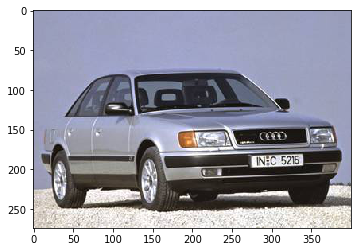

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from efficientnet.keras import center_crop_and_resize, preprocess_input


labels = []
for key in train_generator.class_indices:
    labels.append(key)

# Predict a new image
def predict_one_image(model, filename):
    image = plt.imread(filename)

    # preprocess input
    image_size = 240
    x = center_crop_and_resize(image, image_size=image_size)
    x = np.expand_dims(x, 0)

    # make prediction
    y = model.predict(x)
    
    
    # print top-1 result
    class_id = np.argmax(y)
    res = labels[class_id]
    print("Top 1 result: " + res)
    
        
filename = 'demo/4.jpg'
predict_one_image(test_model1, filename)
image = plt.imread(filename)
plt.imshow(image)


In [67]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(labels)

{'AM General Hummer SUV 2000': 0, 'Acura Integra Type R 2001': 1, 'Acura RL Sedan 2012': 2, 'Acura TL Sedan 2012': 3, 'Acura TL Type-S 2008': 4, 'Acura TSX Sedan 2012': 5, 'Acura ZDX Hatchback 2012': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Series Wagon 2012': 28, 'BMW 6 Series Convertible 2007': 29, 'BMW ActiveHybrid 5 Sedan 2012': 30, 'BMW M3 Coupe 2012': 31, 'BMW M5 Sed

Image name:  01591.jpg
Original shape:  194 259
Resized shape:  128 192
Labels:  Audi 100 Wagon 1994


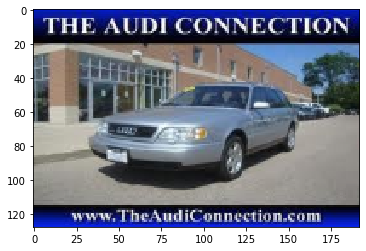

In [0]:
# show example image in train set
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt

def peek_image(path, idx, labels):
    image_names = os.listdir(path)
    im = cv.imread(path + '/' + image_names[idx])[:,:,::-1]
    print("Image name: ", image_names[idx])
    name = image_names[idx].split('.')
    w, h, ch = im.shape
    print("Original shape: ", w, h)
    h_resize = int(128*1.5)
    w_resize = 128
    im = cv.resize(im, (h_resize, w_resize), interpolation=cv.INTER_LINEAR)
    w, h, ch = im.shape
    print("Resized shape: ", w, h)
    print("Labels: ", labels)
    plt.imshow(im)

path = "/content/drive/My Drive/CarModelsClassification/car_data/car_data/train/Audi 100 Wagon 1994"
peek_image(path, 7, "Audi 100 Wagon 1994")